In [1]:
# project: p5
#https://stackoverflow.com/questions/44980774/attributeerror-series-object-has-no-attribute-days
#https://www.geeksforgeeks.org/python-pandas-dataframe-sum/#:~:text=sum()%20function%20return%20the,the%20values%20in%20each%20column.

In [2]:
import pandas as pd
import re
from edgar_utils  import * 
from zipfile import ZipFile
from graphviz import Digraph, Graph

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
csvfile= pd.read_csv("server_log.zip",compression="zip")

In [4]:
#q1
int(csvfile["size"].sum())

24801002666

In [5]:
#q2
csvfile.groupby(["ip"]).size().sort_values(ascending=False)[:10].to_dict()

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [6]:
#q3
total=0
totalerr=0
for i in csvfile["code"]:
    total+=1
    if i>400:
        totalerr+=1
fractionerr=totalerr/total
float(fractionerr)

0.03466852724527611

In [7]:
#q4
csvfile.groupby(["cik"]).size().sort_values(ascending=False).to_dict()
fullstring=csvfile['cik'].astype(int).astype(str)+"/"+csvfile['accession']+"/"+csvfile['extention']
fullstring.value_counts().index[0]

'1627631/0001627631-15-000004/.txt'

In [8]:
#q5
totcrawl=0
for i in csvfile["crawler"]:
    if i >0:
        totcrawl+=1
totcrawl

971

In [9]:
#q6
csvfile["region"]=csvfile["ip"].apply(lookup_region)
csvfile['region'].value_counts().index[0]

'United States of America'

In [10]:
num=0
df = pd.DataFrame()  
lisst=[]
lisst2=[]
value=csvfile['ip'].value_counts()
for i in csvfile['ip'].value_counts().index[:]:
    #lisst.append(csvfile["region"][num])
    lisst.append(lookup_region(i))
    lisst2.append(value[num])
    num+=1

df["region"]= lisst
df["count"]=lisst2

country={}
amount=0
for row in df.itertuples():
    if row.region in country:
        country[row.region].append(row.count)
    else:
        country[row.region] = [row.count]

In [11]:
#q7
avg=0
newdict={}

for i in country.keys():
    total=0
    overthous=0
    for k in country[i]:
        total+=1
        if k >1000:
            overthous+=1
    avg=overthous/total
    newdict[i]=avg
newdict

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Korea (Republic of)': 0.2,
 'Canada': 0.017857142857142856,
 'France': 0.0036900369003690036,
 'Bulgaria': 0.3333333333333333,
 'Ireland': 0.3125,
 'Australia': 0.07692307692307693,
 'Hong Kong': 0.0,
 'Germany': 0.0,
 'Czechia': 0.0,
 'Estonia': 0.0,
 'Viet Nam': 0.0,
 'Poland': 0.0,
 'Netherlands': 0.0,
 '-': 0.0,
 'Slovakia': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Indonesia': 0.0,
 'Ukraine': 0.0,
 'Croatia': 0.0,
 'Italy': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Virgin Islands (British)': 0.0,
 'Liberia': 0.0,
 'Singapore': 0.0,
 'Denmark': 0.0,
 'Romania': 0.0,
 'Luxembourg': 0.0,
 'Switzerland': 0.0,
 'Israel': 0.0,
 'Philippines': 0.0,
 'Egypt': 0.0,
 'Brazil': 0.0,
 'Honduras': 0.0,
 'Greece': 0.0,
 'Sweden': 0.0,
 'Japan': 0.0,
 'Cyprus': 0.0,
 'Latvia': 0.0,
 'Thailand':

In [12]:
#q8
from io import TextIOWrapper
with ZipFile('docs.zip') as zf:
    with zf.open("850693/0000850693-07-000159/-index.htm", "r") as f:
        tio = TextIOWrapper(f)
        tio=tio.read()
addr=Filing(tio)
list(addr.dates)

['2007-07-25', '2007-07-25', '2007-07-23']

In [13]:
#q9
statedict={}
sicl={}
filingdict={}
req={}
with ZipFile('docs.zip') as zf:
    for info in zf.infolist():
        with zf.open(info, "r") as f:
            
            tio2 = TextIOWrapper(f)
            tio2=tio2.read()
            addr2=Filing(tio2)
            req[info.filename]=addr2
            #qq9
            if addr2.state()!=None:
                if addr2.state() in statedict:
                    statedict[addr2.state()] +=1
                else:
                    statedict[addr2.state()] = 1
            #qq10
            if addr2.sic!=None:
                if addr2.sic in sicl:
                    sicl[addr2.sic] +=1
                else:

                    sicl[addr2.sic] = 1
            
            
statedict

{'OX': 6,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CA': 91,
 'CO': 25,
 'NY': 83,
 'TX': 64,
 'FL': 21,
 'AL': 1,
 'IN': 4,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 10,
 'IL': 25,
 'GA': 8,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [14]:
#q10
sicl



{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [15]:
#q11
sicdi=[]
for path in fullstring:
    if path in req:
        sicdi.append(req[path].sic)
dictq11=dict(pd.value_counts(sicdi))
dictq11

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 2510: 171,
 6282: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 5311: 90,
 6798: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 900: 39,
 7370: 39,
 3621: 38,
 6513: 38,
 5172: 36,
 4213: 35,
 5900: 35,
 3990: 34,
 5122: 34,
 2070: 33,
 5944: 33,
 8090: 32,
 1700: 31,
 4922: 31,
 3312: 31,
 1381: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 3663: 23,
 4955: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 6792: 19,
 5812: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 6035: 7,
 4833: 7,
 2430: 6,
 3571: 6,
 3674: 5,
 3679: 5,
 4813: 4,
 4812: 4,
 3678: 4,
 5500: 4,
 1531: 4,
 6411: 3,
 3576: 3,
 8062: 3,
 2800: 3,
 3420: 3,
 1400: 3,
 2111: 2,
 7900: 2,
 5661: 2,
 6141: 

In [16]:
#q12
csvfile['time']=pd.to_datetime(csvfile["time"])
reqhour={}
hour=csvfile['time'].dt.hour
for i in hour:
    if i in reqhour:
        reqhour[i]+=1
    else:
        reqhour[i]=1
reqhour

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

['NY'] ['NJ', 'CA'] ['CA', 'VA']


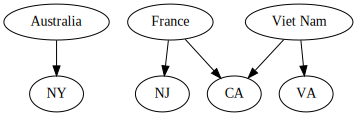

In [17]:
#q13
csvfile["fullstring"]=fullstring
cs=csvfile.loc[:,['region','fullstring']]
ls=['Australia','France','Viet Nam']
fcs=cs.loc[cs.region.str.contains('Australia|France|Viet Nam')]
fcs
f=[]
a=[]
v=[]
num=0
for i in fcs.itertuples():

    if i.fullstring in req:
        
        if i.region=='Australia':
            if req.get(i.fullstring).state() not in a:
                a.append(req.get(i.fullstring).state())
                
        if i.region=='Viet Nam':
            if req.get(i.fullstring).state() not in v:
                v.append(req.get(i.fullstring).state())
                
        if i.region=='France':
            if req.get(i.fullstring).state() not in f:
                f.append(req.get(i.fullstring).state())
    num+=1
print(a,f,v)
g = Digraph()
for i in a:
    g.edge("Australia",i)
for i in f:
    g.edge("France",i)
for i in v:
    g.edge("Viet Nam",i)

g

In [18]:
#q14
answer={}
for i in cs.itertuples():

    if i.fullstring in req:
        for j in req.get(i.fullstring).addresses:
            if j in answer:
                answer[j]+=1
            else:
                answer[j]=1
answer2={}        
for addr,amo in answer.items():
    if amo>=225:
        answer2[addr]=amo
answer2

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

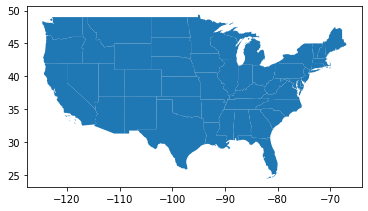

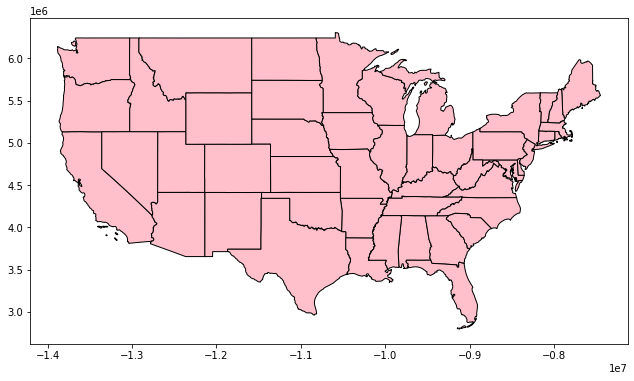

In [38]:
#q15
import rasterio
from rasterio.mask import mask
from shapely.geometry import Polygon, box, Point
import geopandas as gpd
west = -130
east = -55
north = 50
south = 20
background = gpd.read_file("locations.geojson")
df = gpd.read_file("shapes/cb_2018_us_state_20m.shp")

usa_window=box(west,south,east,north)
usa= df.intersection(usa_window)

usa=df[~usa.is_empty]
usa
df
usa.plot()
usa=usa.to_crs("epsg:3395")
# # #centroids_after=usa.centroid
ax= usa.plot(color="pink",edgecolor="k", figsize=(12,6))
#centroids_after.plot(ax=ax, color="k")

In [33]:
# x=0
# for i in background.itertuples():
#     if i.address in answer2:
#         background["headquarter"][x]=answer2.get(i.address)
#     else:
#         background["headquarter"][x]=0
#     x+=1

# filter out dataframe"locations" not pandas series"df/usa" !!!! so that you still have count column!!! 
background[~]

,address,geometry
0,245 SUMMER STREET\nBOSTON MA 02210,POINT (-71.05374 42.35127)
1,100 PINE STREET\nSUITE 2800\nSAN FRANCISCO CA ...,POINT (-122.39902 37.79269)
2,1401 17TH STREET\nSUITE 1000\nDENVER CO 80202,POINT (-104.99708 39.75117)
3,10550 TALBERT AVENUE\nFOUNTAIN VALLEY CA 92708,POINT (-117.94184 33.70046)
4,388 GREENWICH ST\n38TH FLOOR\nNEW YORK NY 10013,POINT (-74.01117 40.72065)
...,...,...
345,1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020,POINT (-73.98189 40.76004)
346,777 OLD SAW MILL RIVER ROAD\nTARRYTOWN NY 10591,POINT (-73.82310 41.07901)
347,200 W DOUGLAS\nSTE 820\nWICHITA KS 67202,POINT (-97.33986 37.68641)
348,8 GREENWAY PLAZA\nSUITE 1000\nHOUSTON TX 77046,POINT (-95.43467 29.73312)
